<a href="https://colab.research.google.com/github/BenzineMohammedAymen/Benzine-Mohammed-Aymen/blob/main/NLP_tp2_(Spam_detection).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

from wordcloud import WordCloud, STOPWORDS

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB

from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#**Dataset Loading**

In [ ]:
# Load Dataset
df = pd.read_csv("/content/spam.csv", encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Now we display how much rows and columns we have in our dataset

In [ ]:
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  5572
Number of columns are:  5


let's take a look about informations of our dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# **Duplicated rows**

In [ ]:
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 403


# **Missing values**

In [ ]:
df.isnull().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


In [ ]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in v1 is 2
No. of unique values in v2 is 5169
No. of unique values in Unnamed: 2 is 43
No. of unique values in Unnamed: 3 is 10
No. of unique values in Unnamed: 4 is 5


#**Remane Columns to (V1: Category), (V2: Message)**

In [ ]:
df.rename(columns={"v1": "Category", "v2": "Message"}, inplace=True)

In [ ]:
df.columns

Index(['Category', 'Message', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

let's drop the unnamed columns (they doesnt present any infomations)

In [ ]:
df.drop(columns={'Unnamed: 2','Unnamed: 3','Unnamed: 4'}, inplace=True)

Create a binary 'Spam' column: 1 for 'spam' and 0 for 'ham', based on the 'Category' column.

In [ ]:
df["Category"] = df["Category"].map({"ham": 0, "spam": 1})

In [ ]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df[df['Category']==0].count()[1] #Ham

4825

In [ ]:
df[df['Category']==1  ].count()[1] #Spam

747

#**Data Vizualisaiton**

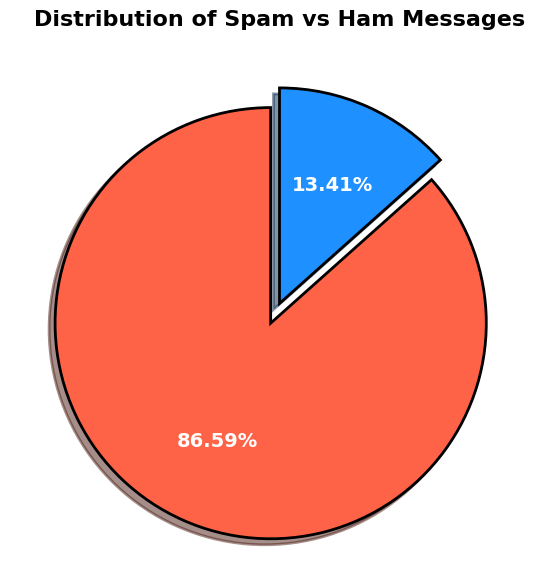

In [ ]:
import matplotlib.pyplot as plt

# Get distribution of Spam vs Ham
spread = df['Category'].value_counts()

# Set figure size
plt.rcParams['figure.figsize'] = (7, 7)

# Create a custom color palette for a more modern look
colors = ['#FF6347', '#1E90FF']  # Red for Spam, Blue for Ham

# Set up the pie chart with additional customizations
plt.pie(
    spread,
    labels=spread.index,
    autopct='%1.2f%%',
    startangle=90,  # Rotate the chart for a better look
    colors=colors,  # Apply custom colors
    explode=(0.1, 0),  # Slightly "explode" the first slice (Spam)
    shadow=True,  # Add a shadow for depth
    textprops={'color': 'white', 'fontsize': 14, 'fontweight': 'bold'},  # Customize text properties
    wedgeprops={'edgecolor': 'black', 'linewidth': 2}  # Add black edges around slices
)

# Title and layout adjustments
plt.title('Distribution of Spam vs Ham Messages', fontsize=16, fontweight='bold')

# Display the chart
plt.show()


we take a copy of spam category only

In [ ]:
df_spam = df[df['Category']==1].copy()

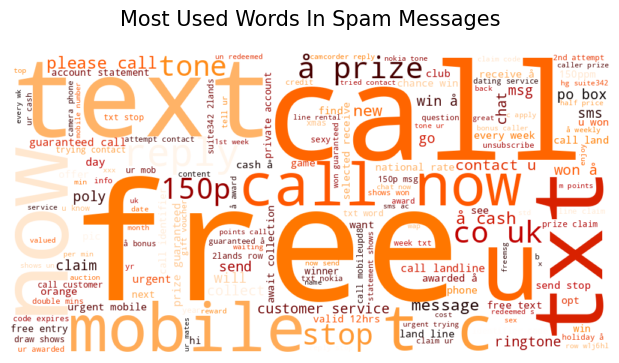

In [ ]:
comment_words = ''

# Ensure that df_spam is your DataFrame containing the 'Message' column with spam messages
stopwords = set(STOPWORDS)  # Get default stopwords from wordcloud

# Iterate through the 'Message' column of df_spam
for val in df_spam['Message']:
    val = str(val)  # Ensure the value is treated as a string
    tokens = val.split()  # Split the message into tokens (words)

    # Remove stopwords and convert to lowercase
    tokens = [word.lower() for word in tokens if word.lower() not in stopwords]

    if tokens:  # Only add to comment_words if there are valid tokens left
        comment_words += " ".join(tokens) + " "

# Check if comment_words is empty
if not comment_words:
    print("Warning: No valid words to generate the word cloud. Please check the data or stopwords.")

# Generate the word cloud
if comment_words:  # Only generate word cloud if there are valid words
    wordcloud = WordCloud(
        width=1000, height=500,
        background_color='white',
        stopwords=stopwords,
        min_font_size=10,
        max_words=1000,
        colormap='gist_heat_r'
    ).generate(comment_words)

    # Plot the word cloud
    plt.figure(figsize=(6, 6), facecolor=None)
    plt.title('Most Used Words In Spam Messages', fontsize=15, pad=20)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)

    # Display the word cloud
    plt.show()



#**Data pre-processing**

Splitting the data to train and test

In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Message']).toarray()
y = df['Category'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape," For trainning\n",X_test.shape," For testing")

(4457, 8672)  For trainning
 (1115, 8672)  For testing


In [ ]:
print("X_train = shape",X_train.shape,"y_train shape = ",y_train.shape)

X_train = shape (4457, 8672) y_train shape =  (4457,)


In [ ]:
print("X_train = shape",X_test.shape,"y_train shape = ",y_test.shape)

X_train = shape (1115, 8672) y_train shape =  (1115,)


#**Model implementaion (Decison Tree)**


In [ ]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def entropy(self, y):
        counts = np.bincount(y)
        probabilities = counts / len(y)
        return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

    def information_gain(self, y, left_idx, right_idx):
        parent_entropy = self.entropy(y)
        left_entropy = self.entropy(y[left_idx])
        right_entropy = self.entropy(y[right_idx])
        n = len(y)
        n_left, n_right = len(left_idx), len(right_idx)
        weighted_avg_entropy = (n_left / n) * left_entropy + (n_right / n) * right_entropy
        return parent_entropy - weighted_avg_entropy

    def best_split(self, X, y):
        best_gain = -1
        best_split = None
        n_features = X.shape[1]

        for feature_idx in range(n_features):
            thresholds = np.unique(X[:, feature_idx])
            for threshold in thresholds:
                left_idx = np.where(X[:, feature_idx] <= threshold)[0]
                right_idx = np.where(X[:, feature_idx] > threshold)[0]
                if len(left_idx) == 0 or len(right_idx) == 0:
                    continue
                gain = self.information_gain(y, left_idx, right_idx)
                if gain > best_gain:
                    best_gain = gain
                    best_split = {
                        "feature_idx": feature_idx,
                        "threshold": threshold,
                        "left_idx": left_idx,
                        "right_idx": right_idx,
                    }
        return best_split

    def build_tree(self, X, y, depth=0):
        num_samples, num_features = X.shape
        num_labels = len(np.unique(y))

        if num_labels == 1 or num_samples == 0 or (self.max_depth is not None and depth >= self.max_depth):
            return {"type": "leaf", "class": Counter(y).most_common(1)[0][0]}

        split = self.best_split(X, y)
        if not split:
            return {"type": "leaf", "class": Counter(y).most_common(1)[0][0]}

        left_tree = self.build_tree(X[split["left_idx"], :], y[split["left_idx"]], depth + 1)
        right_tree = self.build_tree(X[split["right_idx"], :], y[split["right_idx"]], depth + 1)

        return {
            "type": "node",
            "feature_idx": split["feature_idx"],
            "threshold": split["threshold"],
            "left": left_tree,
            "right": right_tree,
        }

    def fit(self, X, y):
        self.tree = self.build_tree(X, y)

    def predict_sample(self, x, tree):
        if tree["type"] == "leaf":
            return tree["class"]

        feature_idx = tree["feature_idx"]
        threshold = tree["threshold"]

        if x[feature_idx] <= threshold:
            return self.predict_sample(x, tree["left"])
        else:
            return self.predict_sample(x, tree["right"])

    def predict(self, X):
        return np.array([self.predict_sample(x, self.tree) for x in X])


In [ ]:
tree = DecisionTree(max_depth=10)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)


In [ ]:
print("Testing Accuracy:", accuracy_score(y_test, y_pred))
print("Testing Classification Report:\n", classification_report(y_test, y_pred))

Testing Accuracy: 0.9605381165919282
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       0.97      0.73      0.83       150

    accuracy                           0.96      1115
   macro avg       0.97      0.86      0.90      1115
weighted avg       0.96      0.96      0.96      1115



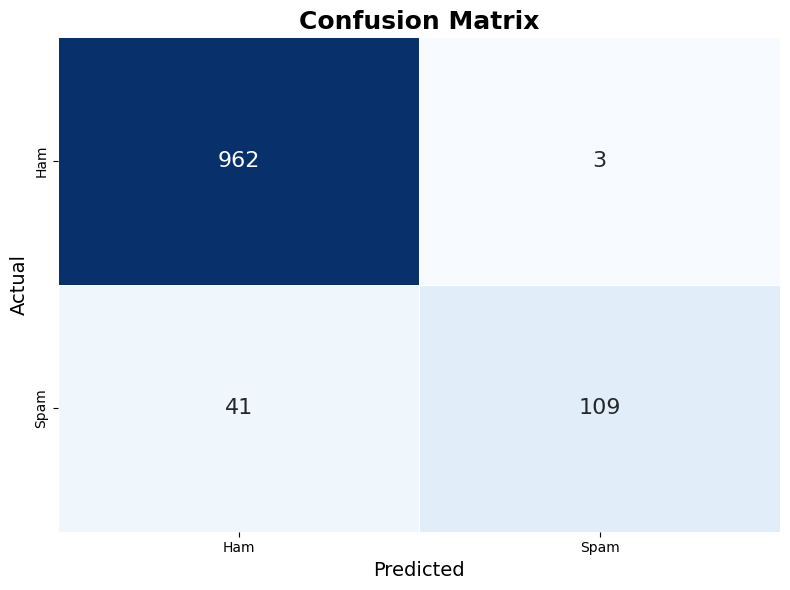

In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Set up the figure size
plt.figure(figsize=(8, 6))

# Create a heatmap for the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'],
            cbar=False, annot_kws={'size': 16}, linewidths=0.5)

# Add title and labels
plt.title('Confusion Matrix', fontsize=18, fontweight='bold')
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
y_predect = tree.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_predect))
print("Training Classification Report:\n", classification_report(y_train, y_predect))

Training Accuracy: 0.973749158626879
Training Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      3860
           1       1.00      0.81      0.89       597

    accuracy                           0.97      4457
   macro avg       0.98      0.90      0.94      4457
weighted avg       0.97      0.97      0.97      4457



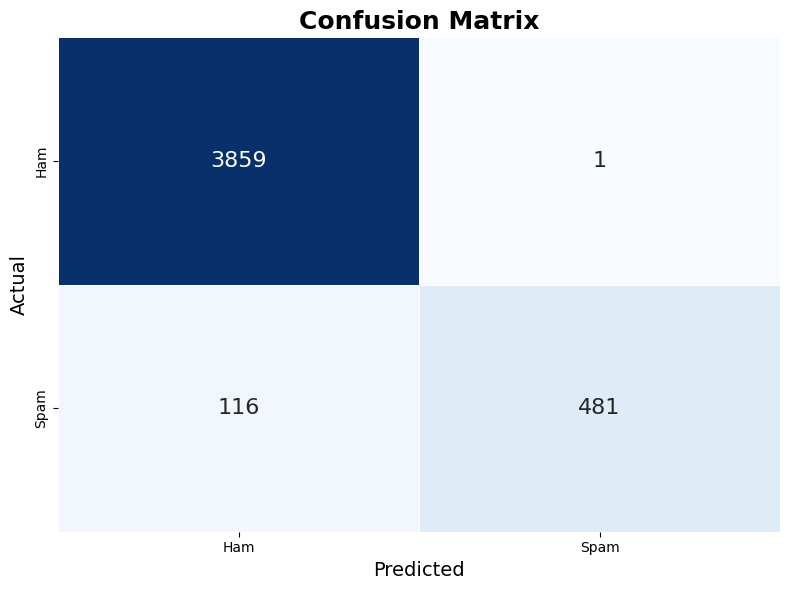

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_train, y_predect)

# Set up the figure size
plt.figure(figsize=(8, 6))

# Create a heatmap for the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'],
            cbar=False, annot_kws={'size': 16}, linewidths=0.5)

# Add title and labels
plt.title('Confusion Matrix', fontsize=18, fontweight='bold')
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()


#**Small test**

In [ ]:
def detect_spam(email_text):
    email_features = vectorizer.transform([email_text]).toarray()

    prediction = tree.predict(email_features)

    if prediction == 0:
        return "This is a Ham Email!"
    else:
        return "This is a Spam Email!"


In [ ]:
spam_email = "Had your mobile 11 months or more? you are entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE"
result = detect_spam(spam_email)
print(result)

This is a Spam Email!


In [ ]:
ham_email = "Hello mohammed,"
result = detect_spam(ham_email)
print(result)

This is a Ham Email!


In [ ]:
wrong_classification = "You won a free computer, submit your location and we will send it to you soon"
result = detect_spam(wrong_classification)
print(result)

This is a Ham Email!


#balance the dataset and ensure that both the "Ham" and "Spam" classes have the same number of samples

In [ ]:
from sklearn.utils import resample


# Separate Ham and Spam emails
ham = df[df['Category'] == 0]
spam = df[df['Category'] == 1]

# Upsample Spam to match the number of Ham
ham_oversampled = resample(ham,
                            replace=True,     # With replacement
                            n_samples=len(spam),  # Match Ham class size
                            random_state=42)  # For reproducibility

# Combine the oversampled Spam and original Ham
df_balanced = pd.concat([ham_oversampled,spam])


In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_balanced['Message']).toarray()
y = df_balanced['Category'].values
X_train_enh, X_test_enh, y_train_enh, y_test_enh = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
tree_enh = DecisionTree(max_depth=10)
tree_enh.fit(X_train_enh, y_train_enh)

y_pred_enh = tree_enh.predict(X_test_enh)


In [ ]:
print("Testing Accuracy:", accuracy_score(y_test_enh, y_pred_enh))
print("Testing Classification Report:\n", classification_report(y_test_enh, y_pred_enh))

Testing Accuracy: 0.9130434782608695
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92       145
           1       0.98      0.85      0.91       154

    accuracy                           0.91       299
   macro avg       0.92      0.91      0.91       299
weighted avg       0.92      0.91      0.91       299



In [ ]:
y_predect_enh = tree_enh.predict(X_train_enh)
print("Training Accuracy:", accuracy_score(y_train_enh, y_predect_enh))
print("Training Classification Report:\n", classification_report(y_train_enh, y_predect_enh))

Training Accuracy: 0.9556485355648535
Training Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       602
           1       1.00      0.91      0.95       593

    accuracy                           0.96      1195
   macro avg       0.96      0.96      0.96      1195
weighted avg       0.96      0.96      0.96      1195



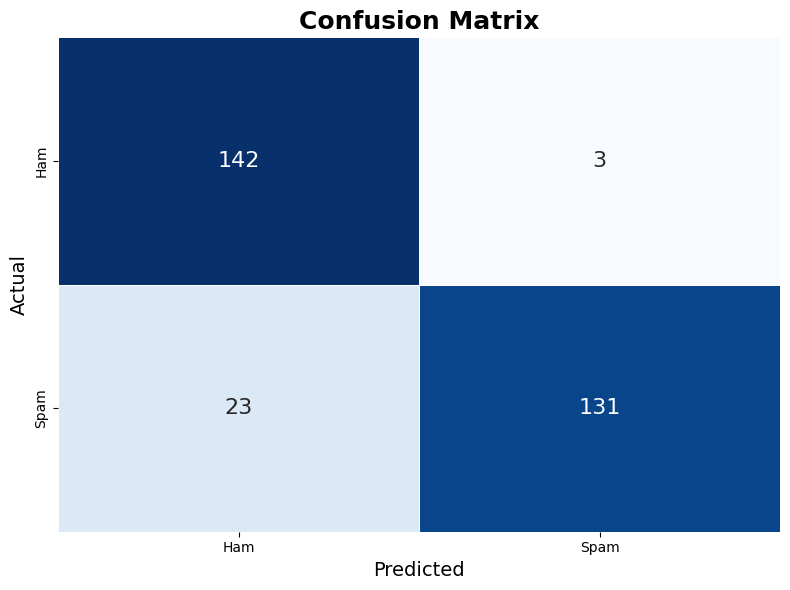

In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_enh, y_pred_enh)

# Set up the figure size
plt.figure(figsize=(8, 6))

# Create a heatmap for the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'],
            cbar=False, annot_kws={'size': 16}, linewidths=0.5)

# Add title and labels
plt.title('Confusion Matrix', fontsize=18, fontweight='bold')
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
def detect_spam_enh(email_text):
    email_features = vectorizer.transform([email_text]).toarray()

    prediction = tree_enh.predict(email_features)

    if prediction == 0:
        return "This is a Ham Email!"
    else:
        return "This is a Spam Email!"


In [ ]:
spam_email = "You won a free computer, submit your location and we will send it to you soon"
result = detect_spam_enh(spam_email)
print(result)

This is a Spam Email!


In [ ]:
ham_email = "good morning, I am your doctor. I would like to point out and remind you that our meeting date is next Sunday."
result = detect_spam_enh(ham_email)
print(result)

This is a Ham Email!
